# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [3]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [31]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl','mleg':'m_leg'}
           

Load up files into a Samuels Viewer

In [5]:
mleg=Sam.Viewer(filenames['mleg'],colors=['g'])

Now we can play with the bag-of-words functionality in the SamuelsViewer

Size of corpus is 165824
(ZC [Grammatical Item],44079) : [('the', 10535), ('of', 3925), ('to', 3543), ('did', 3091), ('in', 2442), ('a', 1893), ('that', 1757), ('and', 1528), ('do', 1467), ('at', 1189)]
(ZF [Pronoun],24808) : [('you', 11066), ('it', 2140), ('your', 2067), ('he', 1882), ('what', 1748), ('that', 1596), ('him', 1174), ('them', 528), ('they', 503), ('she', 465)]
(NULL,14837) : [('?', 6548), (',', 4713), ('.', 2614), (';', 329), (')', 209), ('(', 209), ('-', 167), ('"', 30), (':', 12), ('!', 3)]
(AK.01.g [State/condition],6741) : [('was', 2500), ('is', 1166), ('were', 927), ('are', 751), ('been', 545), ('be', 499), ('being', 157), ('way', 75), ("'s", 62), ('am', 28)]
(ZA01 [Personal Name],2712) : [('mr.', 810), ('mrs.', 186), ('walsh', 46), ('aslett', 41), ('thomas', 40), ('swinton', 33), ('march', 30), ('kelly', 30), ('jones', 28), ('john', 27)]
(AP.04 [Number],2231) : [('last', 247), ('one', 226), ('two', 201), ('first', 136), ('three', 109), ('next', 60), ('five', 59), (

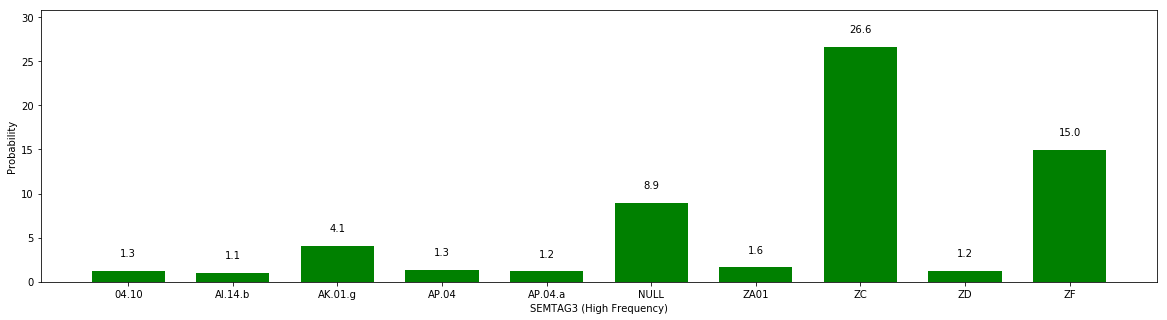

In [6]:
mleg_tagbag=mleg.make_bow(field='SEMTAG3',cutoff=10,displaygraph=True)

There are functions to find tags for words and words for tags e.g.,

In [34]:
print(mleg.find_tags('woman',field='SEMTAG3'))
print(mleg.find_tags('women',field='SEMTAG3'))

[('AD.03.b [Woman]', 173), ('AY.06.b [The common people]', 4), ('AY.01.g.01 [Married woman]', 3), ('BB.09.b.01 [Servant]', 1)]
[('AD.03.b [Woman]', 12)]


In [35]:
print(mleg.find_tags('man',field='SEMTAG3'))
print(mleg.find_tags('men',field='SEMTAG3'))

[('AD.03.a [Man]', 583), ('AD.03.h.01 [Old man]', 1)]
[('AD.03.a [Man]', 74)]


In [36]:
print(mleg.find_tags('child',field='SEMTAG3'))
print(mleg.find_tags('children',field='SEMTAG3'))

[('AD.03.d [Child]', 20), ('AY.01.e.02 [Child]', 2), ('ZA01 [Personal Name]', 1)]
[('AD.03.d [Child]', 6)]


In [39]:
print(mleg.find_text('AD.03.b'))

[('woman', 173), ('women', 12), ('wife', 5), ('piece', 1), ('mare', 1)]


In [40]:
print(mleg.find_text('AD.03.a'))

[('man', 583), ('men', 74), ('horse', 3), ('horses', 2), ('gentleman', 2), ('boy', 2), ('pieces', 1), ('piece', 1), ('birds', 1)]


In [41]:
print(mleg.find_text('AD.03.d'))

[('child', 20), ('children', 6)]


We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* The list of words (and associated words) for the conceptual features ARE NOW context-specific i.e., words used to express this conceptual feature in the specific context of the given tag.

(_det:ZC [Grammatical Item],0.8652375771084915) : [('the', 88), ('this', 43), ('a', 20), ('these', 1)]
(_amod:AF.05 [Plants defined by age/cycles],0.41137177570358824) : [('young', 26)]
(attr:AK.01.g [State/condition],0.12960101128555862) : [('is', 9), ('was', 7), ('are', 4), ('were', 2), ('be', 1)]
(_amod:AP.01.f [Difference],0.09049874491653091) : [('other', 10)]
(_det:ZF [Pronoun],0.07382655710364543) : [('that', 14)]
(_amod:AY.01.g [Marriage/wedlock],0.06715124203000478) : [('married', 4)]
(_amod:AW.04 [Poverty],0.049768369783466285) : [('poor', 3)]
(_amod:AO.19.a [Calamity/misfortune],0.04683214460039507) : [('unfortunate', 3)]
(_amod:AP.01.d [Identity],0.04320978072265382) : [('same', 5)]
(attr:ZZ [Unrecognised],0.04271295936821585) : [('are', 4)]
(_case:ZC [Grammatical Item],0.04041908879356515) : [("'s", 7)]
(appos:AM.08.b [The present (time)],0.039207911588777476) : [('now', 2)]
(dobj:AR.36 [Knowledge],0.03772633737742122) : [('know', 6), ('known', 1)]
(dobj:AS.06 [Accusation,

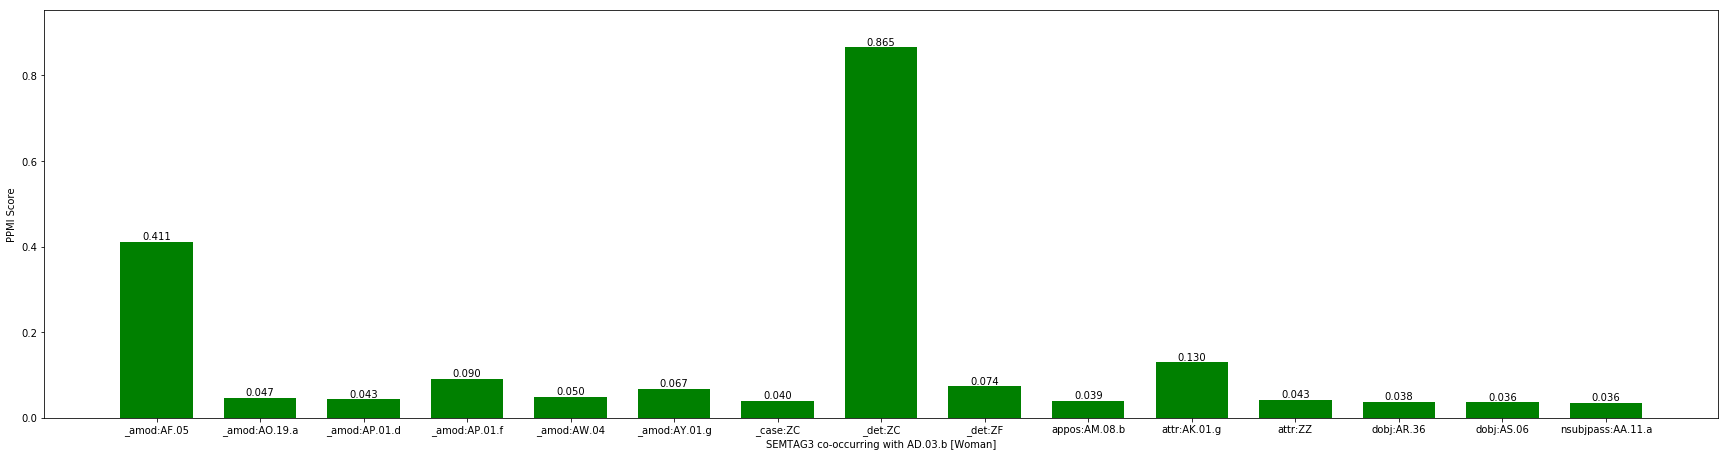

In [10]:
woman=mleg.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8365017841994749)
(_amod, 0.4862699046894988)
(attr, 0.15349810790255566)
(_relcl, 0.14650943809815098)
(nsubj, 0.07918152963183712)
(dobj, 0.06844931769820553)
(_appos, 0.05091964157182276)
(pobj, 0.04651114025413175)
(_case, 0.03341802238871892)
(nsubjpass, 0.028253541342879072)
(appos, 0.0274605073467432)
(_acl, 0.017357618954251832)
(dative, 0.006626453030426499)
(_cc, 0.006026146199612476)
(_predet, 0.003830854470291846)


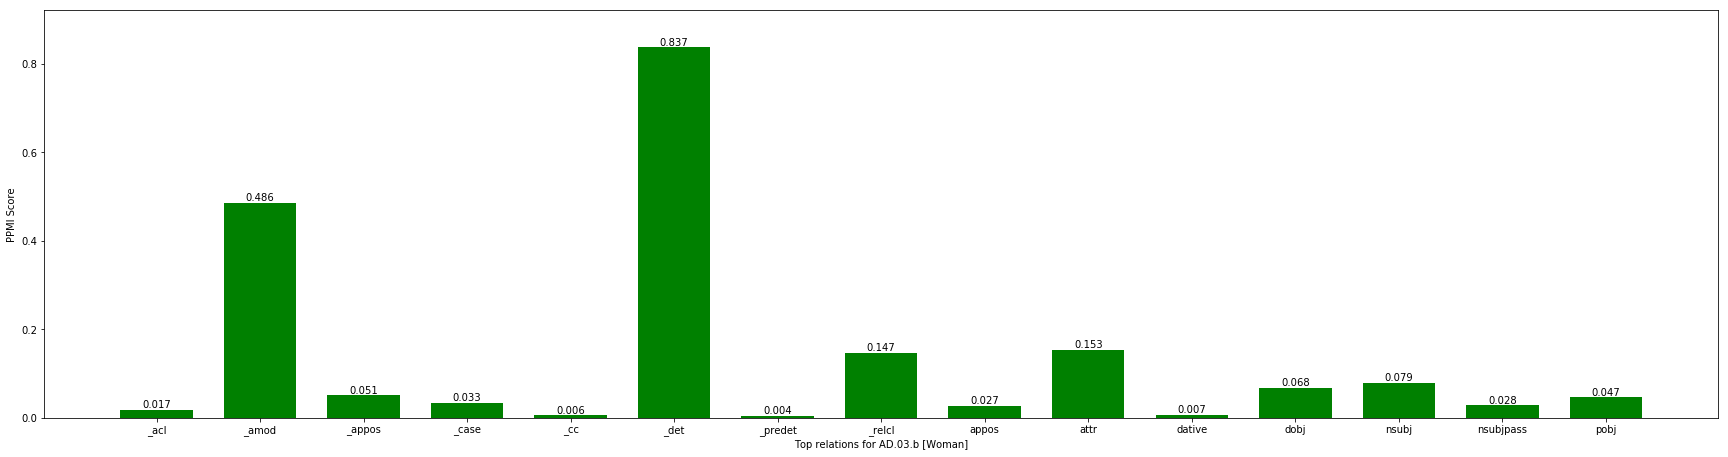

In [42]:
r=mleg.get_top_relations('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8701749279767876)
(_amod, 0.3253232386807805)
(_relcl, 0.24065804452113365)
(attr, 0.23961782119402358)
(nsubj, 0.11673062650900645)
(dobj, 0.06955076677115313)
(_case, 0.031977319316120564)
(_acl, 0.02719852463422484)
(_nummod, 0.024591432434779667)
(pobj, 0.022776962932837017)
(nsubjpass, 0.013110420274982337)
(_appos, 0.008003691587551185)
(appos, 0.0050038788801018376)
(poss, 0.002485074819710505)
(dative, 0.002287298362725539)


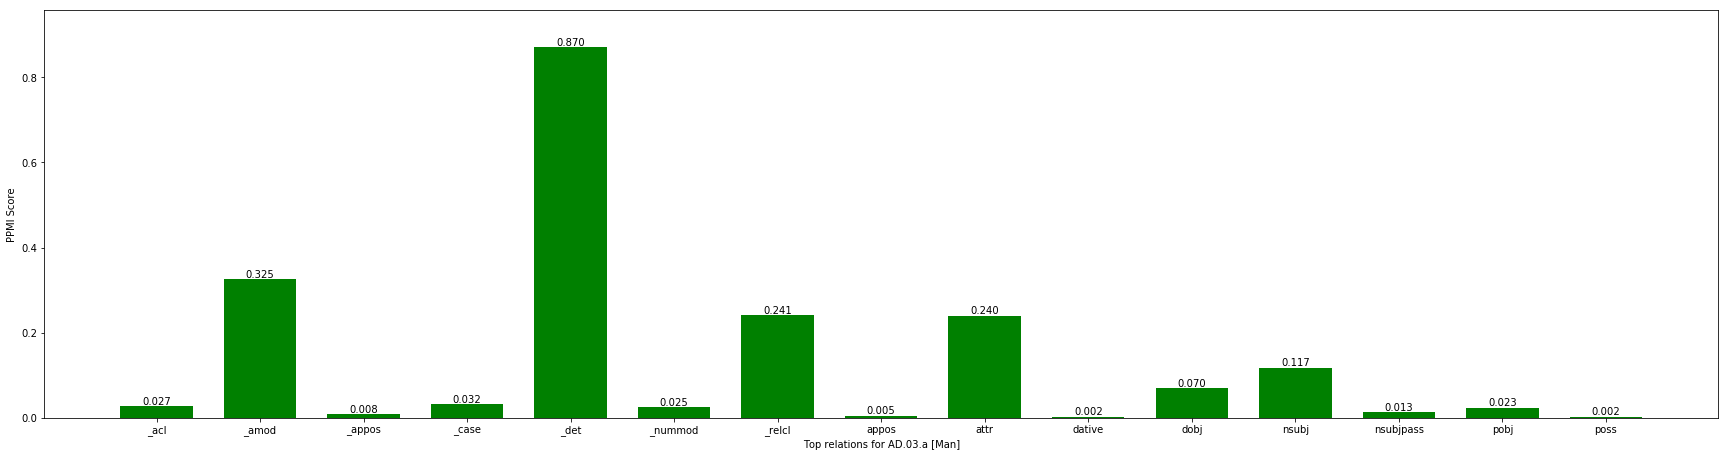

In [43]:
mr=mleg.get_top_relations('AD.03.a',displaygraph=True,cutoff=15)

(_det, 0.8862383169663842)
(_case, 0.3233304951994236)
(attr, 0.1956415867771171)
(poss, 0.16587162506834763)
(dobj, 0.15157853300611482)
(_amod, 0.06715715266147702)
(_relcl, 0.06493289441665695)
(appos, 0.04940726771131967)
(_appos, 0.04940726771131967)
(conj, 0.047541709797999564)
(_acl, 0.043819696450553704)
(_nummod, 0.04293504203421325)
(nsubj, 0.029236502458084)
(_prep, 0.019788313127798524)
(_compound, 0.016676899508065054)


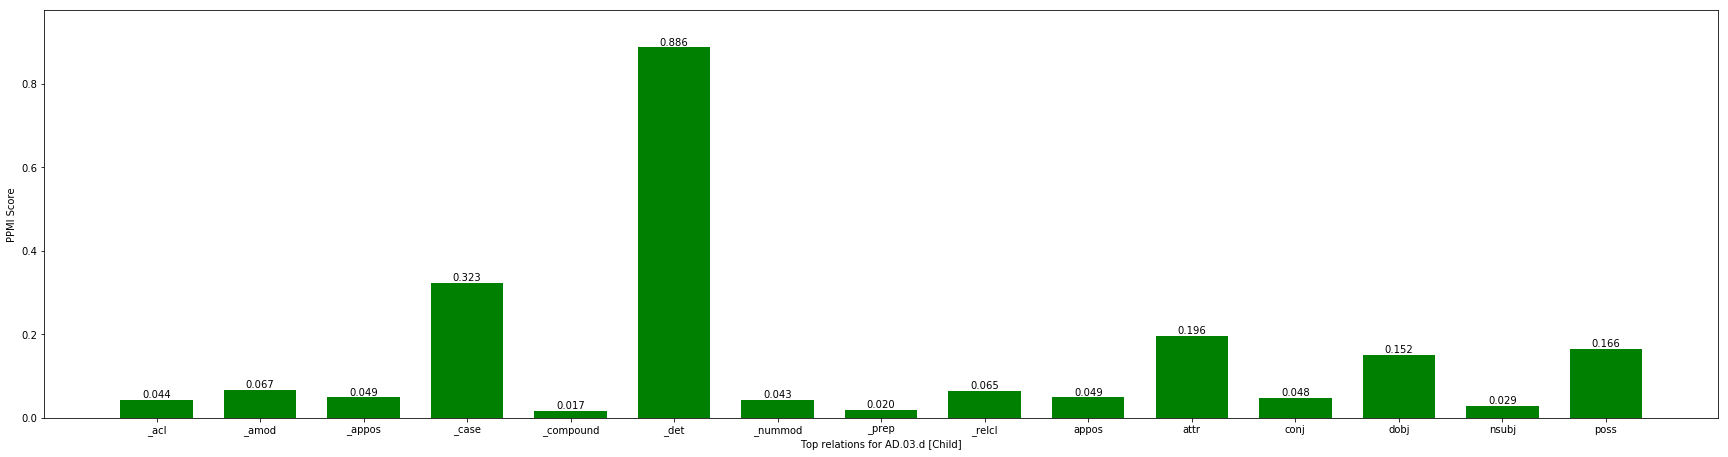

In [45]:
mr=mleg.get_top_relations('AD.03.d',displaygraph=True,cutoff=15)

(AF.05 [Plants defined by age/cycles],0.961691046419818) : [('young', 26)]
(AY.01.g [Marriage/wedlock],0.16745115517618195) : [('married', 4)]
(AW.04 [Poverty],0.12258497737184515) : [('poor', 3)]
(AO.19.a [Calamity/misfortune],0.10776529418931746) : [('unfortunate', 3)]
(AP.07.e.05 [Fact/action of being joined/joining],0.09064843934487954) : [('married', 2)]
(AU.04 [Intense emotion],0.056076406056189174) : [('mad', 1)]
(AT.06 [Badness/evil],0.05408154977731289) : [('bad', 2)]
(AL.05.e [Closed/shut condition],0.04532421967243977) : [('close', 1)]
(AB.03 [Age],0.039034593837181754) : [('young', 1)]
(AB.17.c [Bodily height],0.031110602410296086) : [('tall', 1)]


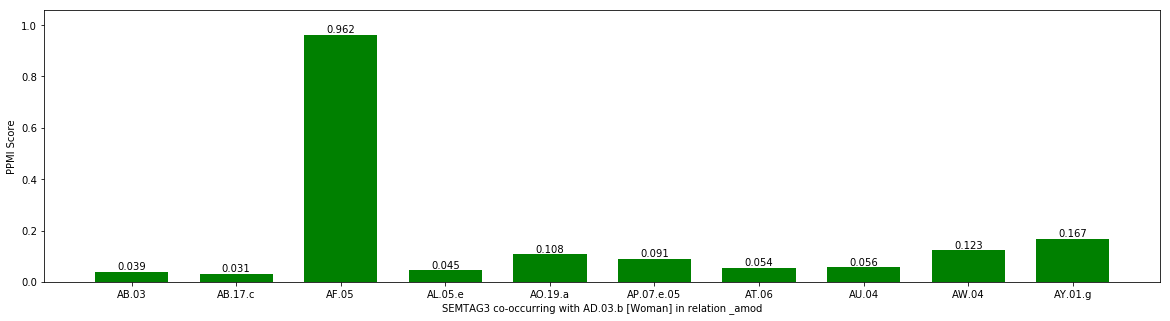

In [13]:
w=mleg.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

(AF.05 [Plants defined by age/cycles],0.8910282407459208) : [('young', 40)]
(AP.01.f [Difference],0.2450494877662125) : [('other', 36), ('different', 1)]
(AP.01.d [Identity],0.23591811714261993) : [('same', 26)]
(AG.01.ak.02.a [Excess in drinking],0.13872482943628223) : [('drunken', 5)]
(AB.17.c [Bodily height],0.11633142433755574) : [('tall', 3), ('taller', 1)]
(BD.04.d [Probity/honesty/uprightness],0.10218480930264344) : [('honest', 4), ('respectable', 1)]
(AG.01.ak.02.b [Moderation in drinking],0.09515146333346901) : [('sober', 3)]
(AW.04 [Poverty],0.09413710534475597) : [('poor', 2), ('distressed', 2)]
(AY.01.g [Marriage/wedlock],0.083599911904353) : [('married', 4)]
(BD.04.e.02 [Innocence],0.06343430888897934) : [('innocent', 2)]


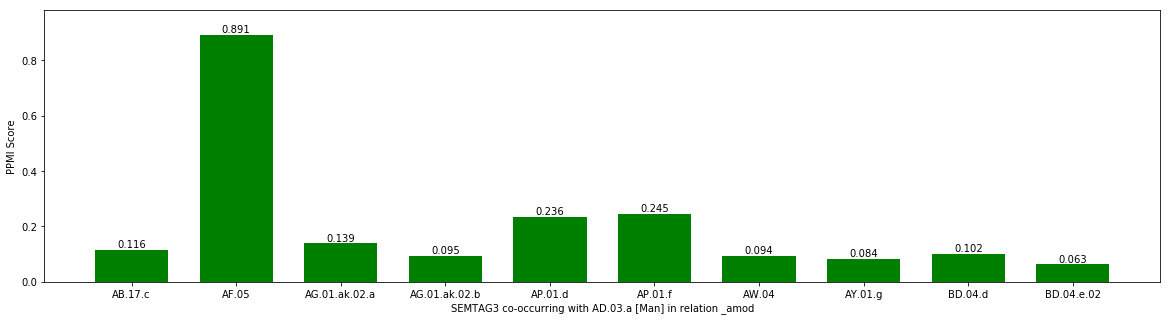

In [14]:
m=mleg.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

(AS.11.a [Unimportance, triviality],0.819034112904566) : [('little', 1)]
(AF.05 [Plants defined by age/cycles],0.5737448229819861) : [('young', 1)]


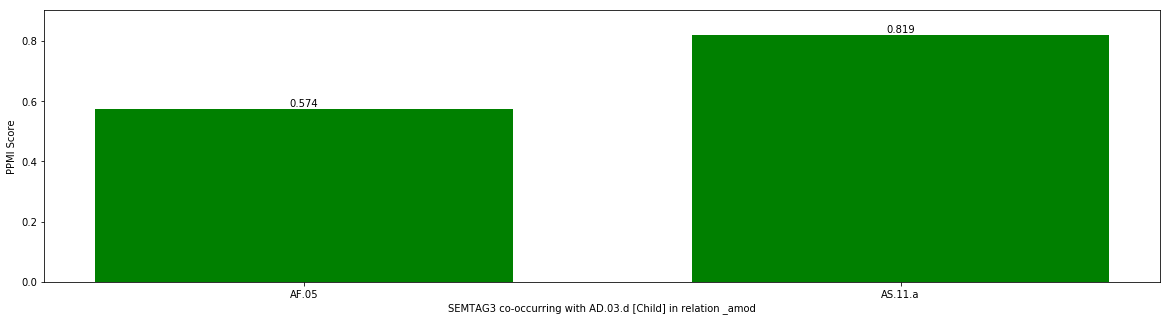

In [15]:
c=mleg.get_top_features('AD.03.d',rel='_amod',cutoff=10,displaygraph=True)

(AS.06 [Accusation, charge],0.5661835900050896) : [('accuse', 3)]
(AR.36 [Knowledge],0.4283637324772247) : [('know', 6), ('known', 1)]
(AO.15.d [Expediency],0.33323004947573326) : [('serving', 1)]
(AS.12.e.01 [Recommendation],0.2516899147846084) : [('recommend', 1)]
(AI.14.b [Seeing/looking],0.2342147744941272) : [('see', 4), ('seen', 2)]
(AR.35 [Memory, keeping in mind],0.22960458688020177) : [('remember', 2)]
(AP.06.e [Insufficiency],0.21877400024054855) : [('wanted', 1)]
(BJ.01.j [Selling],0.19720579689278595) : [('sell', 2)]
(AG.01.v [Serving food],0.19218878940652256) : [('serve', 1)]
(AP.01.l [Accompaniment],0.14880412388546463) : [('attended', 1)]


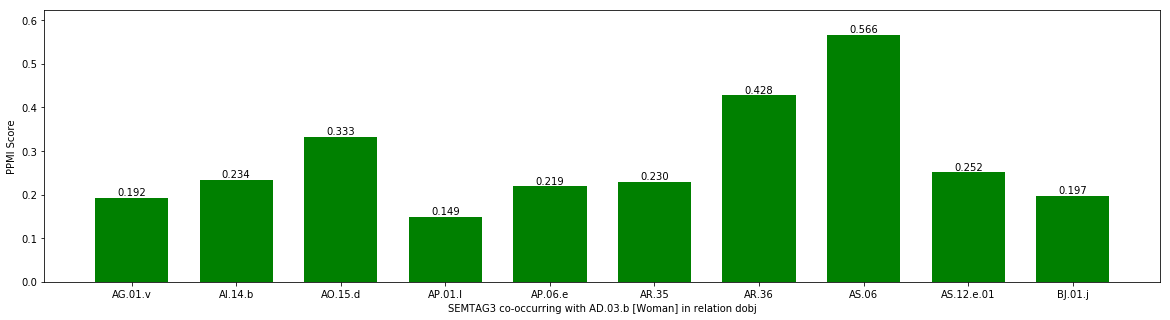

In [46]:
w=mleg.get_top_features('AD.03.b',rel='dobj',displaygraph=True)

(AR.36 [Knowledge],0.7253765241181376) : [('know', 20), ('known', 6), ('had', 2), ('knowing', 1)]
(AI.14.b [Seeing/looking],0.43842277683083347) : [('see', 13), ('saw', 7), ('seen', 4), ('sees', 1)]
(AS.06 [Accusation, charge],0.32418207463550686) : [('accuse', 5), ('accused', 1)]
(AC.01.f [Pain],0.21748346854074588) : [('suffer', 3)]
(AA.11.a [Fine weather],0.1455696628936026) : [('take', 3)]
(BC.09.e.02 [Arrest],0.13486052183219896) : [('arrested', 1), ('arrest', 1)]
(AR.47.b [Lack of confidence, distrust, suspicion],0.10369947493122578) : [('suspected', 2)]
(AT.01 [Goodness, acceptability],0.08956836022013147) : [('good', 1)]
(AK.02.b.06 [Rubbing/friction],0.08956836022013147) : [('rub', 1)]
(AO.21.g [Care/carefulness/attention],0.08956836022013147) : [('see', 1)]


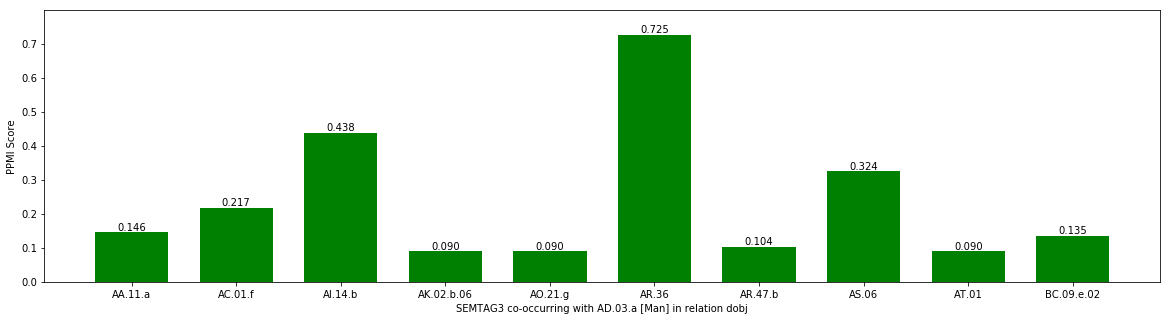

In [47]:
m=mleg.get_top_features('AD.03.a',rel='dobj',displaygraph=True)

(AV.02.b [Desire],0.644781905389677) : [('wished', 1)]
(AM.08.c [The past],0.48696797017041693) : [('was', 1)]
(AN.06 [Transference],0.3587365582730772) : [('brought', 1)]
(ZZ [Unrecognised],0.3082326728539877) : [('had', 1)]
(AO.11.b.01 [Finding/discovery],0.2811012479788373) : [('found', 1)]
(AR.01 [Mental capacity],0.21071611243228514) : [('have', 1)]


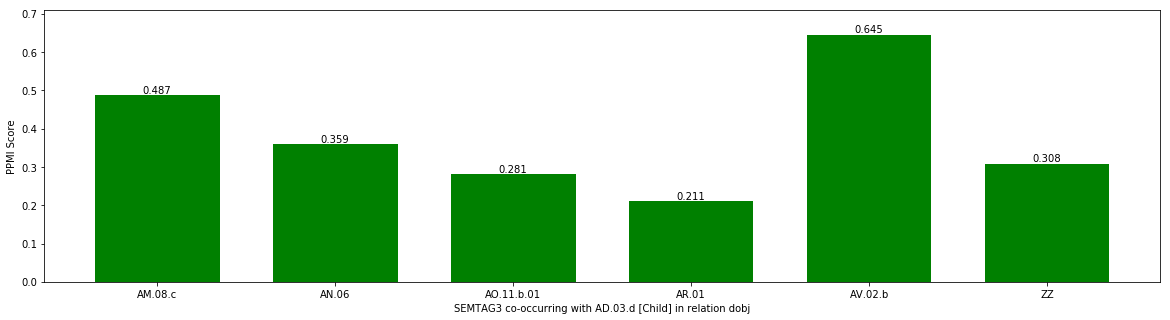

In [48]:
c=mleg.get_top_features('AD.03.d',rel='dobj',displaygraph=True)

(AM.08.c [The past],0.34531687630790736) : [('was', 4)]
(AU.05 [Excitement],0.29050287304421274) : [('excited', 1)]
(AU.22.b [Complaint],0.29050287304421274) : [('complained', 1)]
(AR.38 [Truth, validity, correctness],0.29050287304421274) : [('held', 1)]
(BK.07.a [Performer],0.29050287304421274) : [('appear', 1)]
(BF.21.i [Salvation, redemption],0.2729071121756101) : [('redeemed', 1)]
(AE.14.j.02 [Horse defined by purpose],0.23051151924924437) : [('running', 1)]
(AW.11 [Giving],0.2040416234315518) : [('given', 3)]
(AW.15 [Taking],0.20243906534105208) : [('took', 3)]
(AW.16.a [Stealing, theft],0.1920633547290763) : [('stole', 1)]


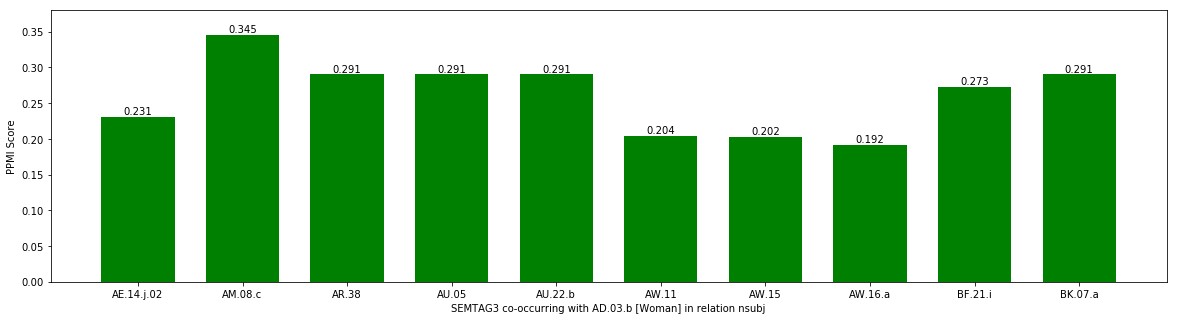

In [49]:
w=mleg.get_top_features('AD.03.b',rel='nsubj',displaygraph=True)

(AY.01.g.03 [Types of marriage custom/practice],0.5827192168504881) : [('lived', 7), ('live', 2)]
(AK.01.g [State/condition],0.3147305759656046) : [('was', 38), ('is', 9), ('were', 4), ('been', 4), ('be', 1)]
(AG.01.ak.02.a [Excess in drinking],0.20283734442879348) : [('drunk', 2)]
(AP.01.k [Equality/equivalence],0.19361507580507384) : [('come', 1), ('came', 1)]
(AN.06 [Transference],0.19326320977094724) : [('brought', 4), ('bring', 2)]
(AI [Physical sensation],0.1912859212850866) : [('come', 2), ('came', 2)]
(AO.16.c [Escape],0.18562638335258053) : [('escaped', 2)]
(AW.14 [Offering],0.15785350813325058) : [('had', 3)]
(AW.16.a [Stealing, theft],0.14801903758617974) : [('stolen', 1), ('steal', 1)]
(AO.22 [Behaviour],0.14801903758617974) : [('carry', 1), ('behave', 1)]


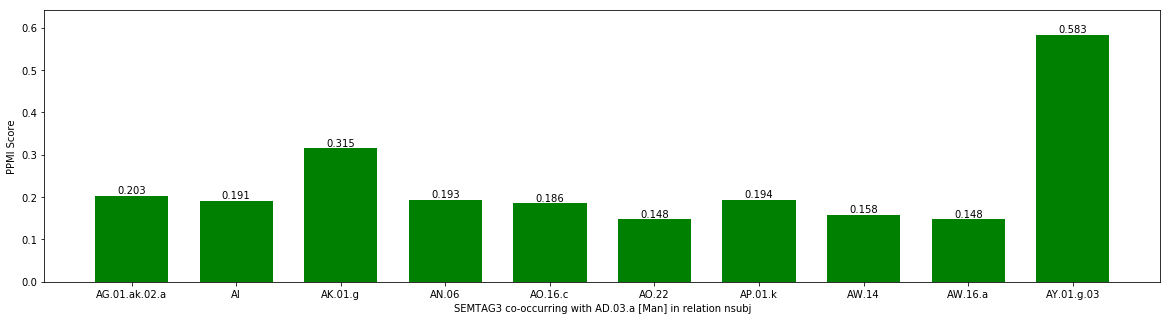

In [51]:
m=mleg.get_top_features('AD.03.a',rel='nsubj',displaygraph=True)

(AK.01.g [State/condition],0.8543910690186797) : [('is', 3), ('been', 1)]
(AW.07 [Loss],0.519630542964054) : [('lost', 1)]


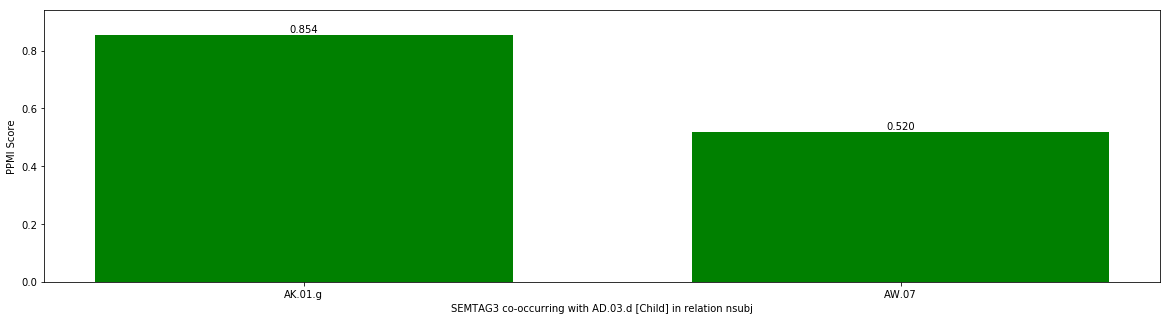

In [52]:
c=mleg.get_top_features('AD.03.d',rel='nsubj',displaygraph=True)

(AA.11.a [Fine weather],0.8422112847322242) : [('taken', 3)]
(AG.03.h [Hawking],0.3121752698817408) : [('taken', 1)]
(BI.08 [Lack of work],0.3006613708818625) : [('dismissed', 1)]
(AO.03 [Undertaking],0.2807370949107414) : [('committed', 1)]
(AO.11.b.01 [Finding/discovery],0.11239577173488688) : [('found', 1)]
(AN.06 [Transference],0.106692862182034) : [('sent', 1)]


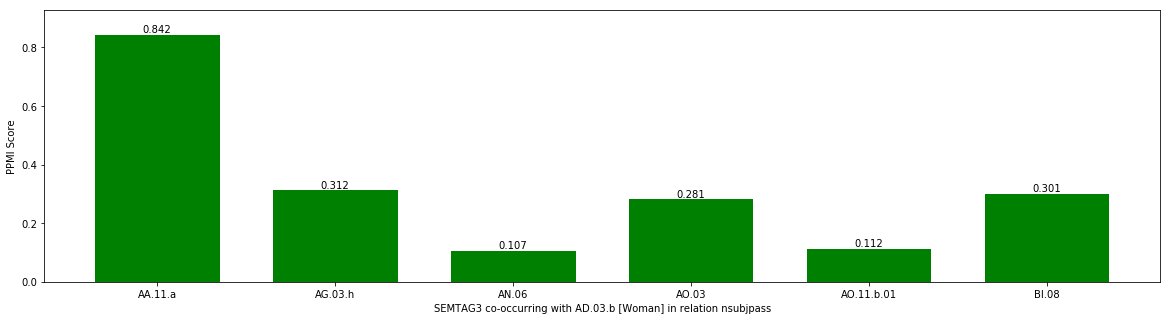

In [53]:
w=mleg.get_top_features('AD.03.b',rel='nsubjpass',displaygraph=True)

(AW.16.c [Robbery, piracy, raiding],0.5694292200277017) : [('robbed', 3)]
(AA.11.a [Fine weather],0.3990979248633102) : [('taken', 3)]
(BI.04.b [Labour supply],0.34763913150181974) : [('employed', 2)]
(BC.09.f.05 [Judging],0.3371974792424431) : [('convicted', 2)]
(AL.05.w.04 [Action/fact of lying down/reclining],0.32107040968969364) : [('laid', 1)]
(AF.30 [Botany],0.32107040968969364) : [('pressed', 1)]
(BC.09.e.03 [Accusation/allegation/indictment],0.1992810809336622) : [('indicted', 1)]
(AJ.07.c.05.b [Electric charge, electricity],0.12136775683219334) : [('charged', 1)]
(AI [Physical sensation],0.11126317401482755) : [('apprehended', 1)]
(AW.15 [Taking],0.09361882173038026) : [('taken', 2)]


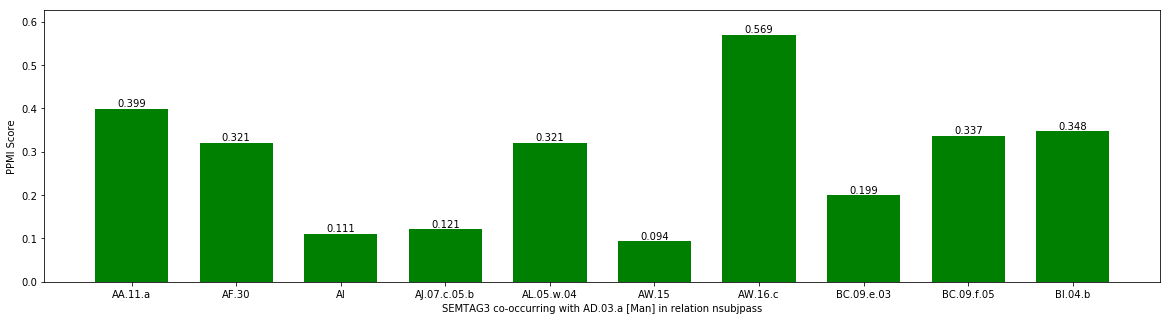

In [54]:
m=mleg.get_top_features('AD.03.a',rel='nsubjpass',displaygraph=True)

In [57]:
try:
    c=mleg.get_top_features('AD.03.d',rel='nsubjpass',displaygraph=True)
except:
    print("No nsubjpass relations found for AD.03.d")

No nsubjpass relations found for AD.03.d


(ZC [Grammatical Item],0.9132889788387636) : [('the', 88), ('this', 43), ('a', 20), ('these', 1)]
(AM.08.b [The present (time)],0.3101656712058194) : [('now', 1)]
(NULL,0.26358903424843844) : [(',', 1)]
(AK.03.a [Cause/reason],0.01487677925721159) : [('that', 1)]


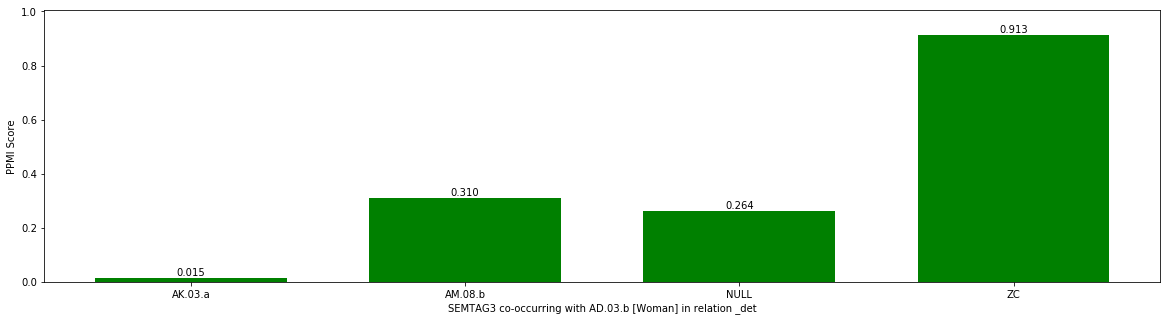

In [58]:
w=mleg.get_top_features('AD.03.b',rel='_det',displaygraph=True)

(ZC [Grammatical Item],0.9618435524039243) : [('the', 310), ('this', 115), ('a', 102), ('an', 7), ('these', 6), ('those', 2), ('that', 1)]
(ZZ [Unrecognised],0.26729253677806963) : [('another', 10)]
(AO.21.g [Care/carefulness/attention],0.04996907265533518) : [('that', 1)]
(AP.02.b [Individual character/quality],0.029430437522242076) : [('each', 1)]
(AP.07.b [The whole/all],0.005585820549157322) : [('all', 1)]
(AP.01 [Relation/relationship],0.004173753197250064) : [('which', 1)]


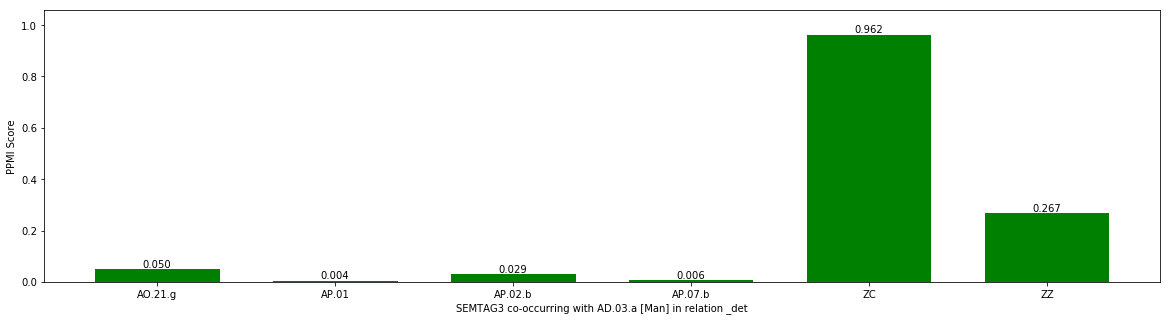

In [59]:
m=mleg.get_top_features('AD.03.a',rel='_det',displaygraph=True)

(AP.02.a [Generality],0.9492770467211822) : [('any', 1)]
(ZC [Grammatical Item],0.284374414148244) : [('the', 13), ('a', 3), ('this', 1)]
(ZF [Pronoun],0.13418003259111747) : [('that', 2)]


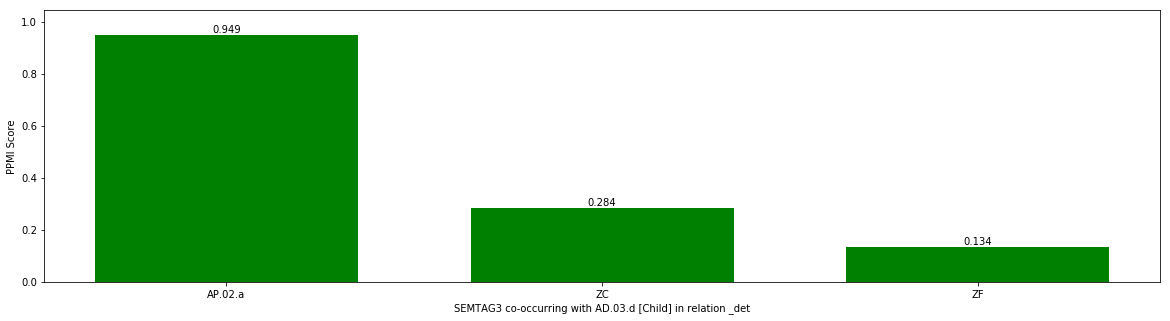

In [60]:
c=mleg.get_top_features('AD.03.d',rel='_det',displaygraph=True)

# Similar Concepts
We can find the similarity between 2 concepts in the given corpus

First, the similarities between WOMAN-MAN, WOMAN-CHILD and MAN-CHILD over the whole LPMI matrix (all grammatical relations)

We can also look at a particular relation.  We can see that MAN and WOMAN are similar in terms of their adjectival modifies and the verbs which are done to them, but disimilar in terms of the verbs they do.  On the other hand, WOMAN and CHILD and MAN and CHILD seem consistently dissimilar in all these relations.


In [61]:
rels=[None,'_amod','dobj','nsubj','_det','nsubjpass']
for rel in rels:
    print(rel)
    print("WOMAN-MAN: {}".format(mleg.find_similarity('AD.03.a','AD.03.b',rel)))
    print("MAN-CHILD: {}".format(mleg.find_similarity('AD.03.a','AD.03.d',rel)))
    print("WOMAN-CHILD: {}".format(mleg.find_similarity('AD.03.b','AD.03.d',rel)))
    print("-----")

None
WOMAN-MAN: 0.9347944124424766
MAN-CHILD: 0.6210182561200907
WOMAN-CHILD: 0.5830092674141701
-----
_amod
WOMAN-MAN: 0.9015932924902647
MAN-CHILD: 0.5112228402587189
WOMAN-CHILD: 0.5517652591914994
-----
dobj
WOMAN-MAN: 0.6121135064783157
MAN-CHILD: 0.00258601705990346
WOMAN-CHILD: 0.0
-----
nsubj
WOMAN-MAN: 0.11048609701587683
MAN-CHILD: 0.2689029932521177
WOMAN-CHILD: 0.0
-----
_det
WOMAN-MAN: 0.8784411157776288
MAN-CHILD: 0.2735236967171318
WOMAN-CHILD: 0.2597160183053214
-----
nsubjpass
WOMAN-MAN: 0.33746005219658787
Error: can't find vectors for those tags and relation
MAN-CHILD: 0
Error: can't find vectors for those tags and relation
WOMAN-CHILD: 0
-----


# Finding Nearest Neighbours


In [62]:
concepts=['AD.03.b','AD.03.a','AD.03.d']
for concept in concepts:
    for rel in rels:
        print('{} neighbours for {}'.format(concept,rel))
        print(mleg.find_knn(concept,rel))
        print("-----")

AD.03.b neighbours for None
[('AD.03.b [Woman]', 1.0), ('AD.03.a [Man]', 0.9347944124424766), ('BB.12.e.02 [Prisoner]', 0.865096175321488), ('BB.09.e.01.a [Confinement]', 0.860276380563296), ('BC.07.b [Law-enforcement/peace-officer]', 0.8452874434990217), ('BA.14.k.08.a [Officer/soldier of rank]', 0.8297236301941681), ('AD.03.d.01 [Boy]', 0.8289851321966392), ('BB.12.d.01 [Instrument/place of torture]', 0.791318871224162), ('AL.05.d.01 [An opening/aperture]', 0.7846714431445975), ('AO.16.a.02 [Refuge/shelter]', 0.7717271285260526)]
-----
AD.03.b neighbours for _amod
[('AD.03.b [Woman]', 0.9999999999999997), ('AD.03.c.01 [Youth/young man]', 0.961691046419818), ('BJ.01.y.02 [Expenditure]', 0.961691046419818), ('AY.06.b [The common people]', 0.961691046419818), ('ZA01 [Personal Name]', 0.9196843556669687), ('AD.03.a [Man]', 0.9015932924902647), ('AD.03.c.02 [Young woman]', 0.8108609187337582), ('AD.03.d [Child]', 0.5517652591914994), ('AY.06.a.02.c [Lord/lady]', 0.4921342985873679), ('AY.

[('AD.03.d [Child]', 0.9999999999999999), ('BH.14.j.01 [Sailor]', 0.9899290230579805), ('AJ.03.a [Weight/relative heaviness]', 0.9816445935145891), ('BJ.01.s.06 [Duty on goods]', 0.9568130496923403), ('BJ.01.m.05 [Medium of exchange/currency]', 0.9492770467211822), ('AG.02.g [Animal husbandry]', 0.9492770467211822), ('AT.17 [Dishonesty]', 0.9492770467211822), ('AW.15.a [Seizing, capture]', 0.9492770467211822), ('AR.53.a [Ancient Greek philosophy]', 0.9492770467211822), ('BJ.01.j.03 [Seller]', 0.9440907420414786)]
-----
AD.03.d neighbours for nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [28]:
test={'mleg':'m_leg','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 165824
Size of corpus is 1248827
204 significantly characterising terms
Number of characteristic tags is 204
(AP.04.a [One], 3235.247489755365) : [('any', 1858), ('only', 57), ('either', 20), ('alone', 4), ('sole', 2), ('single', 2), ('one', 2), ('solely', 1), ('singly', 1)]
(AM.08.c [The past], 1751.5576587405735) : [('was', 635), ('yesterday', 4), ('formerly', 4), ('sometime', 2), ('going', 1), ('back', 1)]
(AS.04 [Enquiry], 1467.9155079114462) : [('how', 478), ('whether', 339), ('question', 31), ('questions', 7), ('ask', 7), ('catechism', 6), ('asked', 5), ('questioned', 1), ('interview', 1)]
(AR.36 [Knowledge], 868.5173098637244) : [('know', 1001), ('known', 81), ('had', 81), ('knowledge', 47), ('knew', 47), ('have', 47), ('knowing', 18), ('acquaintance', 15), ('has', 11), ('of', 8)]
(AM.03 [Particular time], 814.3778437119302) : [('when', 980), ('day', 176), ('ever', 115), ('date', 10), ('there', 10), ('time', 9), ('arrived', 7), ('of', 5), ('occasion', 5), ('arr

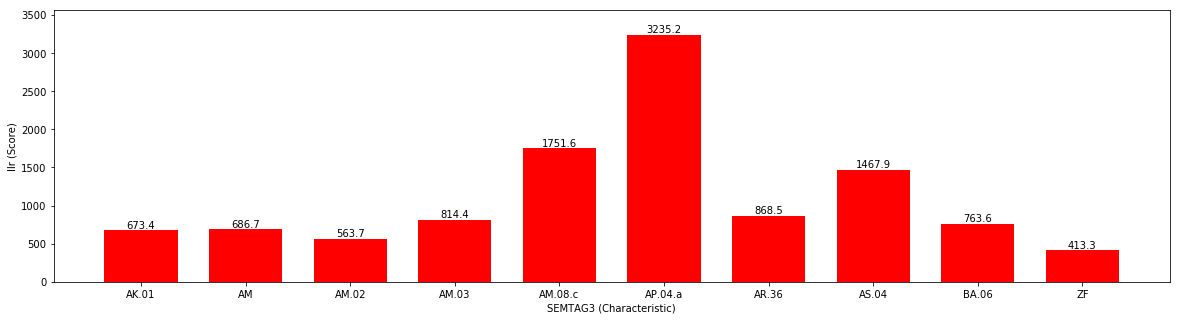

In [29]:
fdef_tags=my_comp.compute_surprises('mleg',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1248827
183 significantly characterising terms
Number of characteristic tags is 183
(NULL, 2708.5372080123925) : [(',', 68482), ('.', 44535), (';', 28994), ('-', 1731), (':', 1378), ('(', 660), (')', 652), ('"', 484), ('?', 390), ('!', 117)]
(AW.01 [Owning], 1496.321347529352) : [('my', 9800), ('his', 6139), ('her', 1525), ('our', 590), ('own', 508), ('their', 225), ('belonged', 193), ('landlord', 159), ('belong', 108), ('belonging', 89)]
(AP.04 [Number], 710.8937355693574) : [('two', 3211), ('one', 2279), ('three', 1709), ('five', 1171), ('four', 1111), ('six', 921), ('ten', 843), ('last', 813), ('seven', 802), ('eight', 747)]
(AX.23 [Agreement, assent], 676.5591027633884) : [('yes', 3105), ('admitted', 16), ('confirmed', 5), ('with', 5), ('admit', 4), ('sat', 3), ('one', 3), ('down', 3), ('at', 3), ('along', 2)]
(AM.07 [Reckoning of time], 435.2459354607949) : [("o'clock", 2581), ('time-keeper', 2), ('time', 2)]
(AX.24 [Denial, dissent], 37

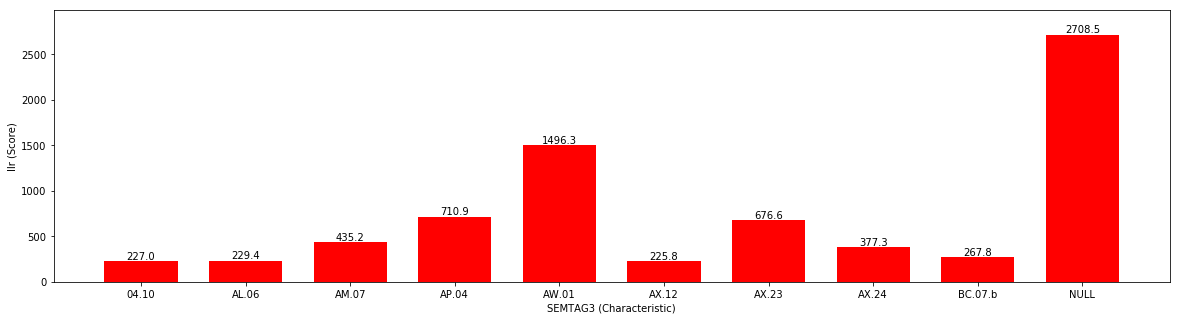

In [30]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)